<a href="https://colab.research.google.com/github/AbhinavKumar0000/Machine_learning_practice/blob/main/Number_identifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()
len(X_train)

60000

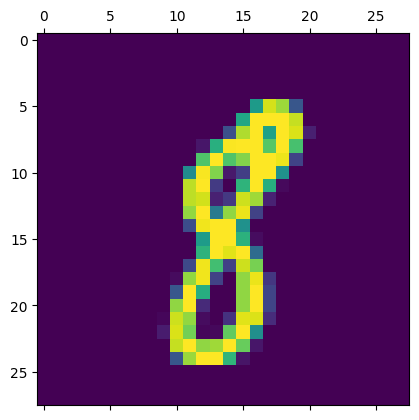

In [ ]:
plt.matshow(X_train[300])

In [ ]:
print(y_train[300])

8


reshaping the 2-d 28by28 matrices into a array single line

In [ ]:
X_train.shape

(60000, 28, 28)

saclling data set by dividing it by 255 to vary it bwtween 0--1 and improve its accuracy of the model

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train_falttened = X_train.reshape(len(X_train),28*28)
X_test_falttened = X_test.reshape(len(X_test),28*28)

In [ ]:
X_train_falttened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
X_test_falttened.shape

(10000, 784)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation="sigmoid")
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train_falttened,y_train, epochs = 5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8199 - loss: 0.7080
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9142 - loss: 0.3097
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9207 - loss: 0.2884
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9230 - loss: 0.2786
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9268 - loss: 0.2600


In [ ]:
model.evaluate(X_test_falttened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9169 - loss: 0.3004


[0.26441267132759094, 0.9276000261306763]

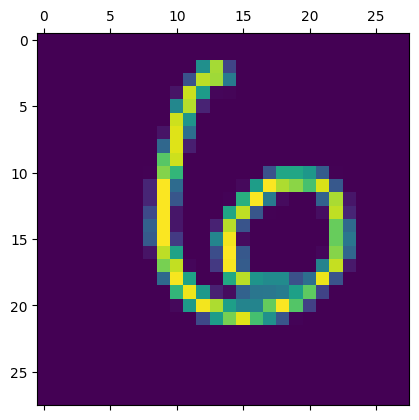

In [ ]:
plt.matshow(X_test[100])

In [ ]:
 y_predicted = model.predict(X_test_falttened)
 y_predicted[100]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


array([0.00400396, 0.01360599, 0.5246747 , 0.02681269, 0.01079416,
       0.00137598, 0.9694942 , 0.00196112, 0.02147644, 0.00104362],
      dtype=float32)

In [ ]:
np.argmax(y_predicted[100])

np.int64(6)

In [ ]:
y_predicted_label= [ np.argmax(i) for i in y_predicted]
y_predicted_label[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
cm  = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    5,    6,    3,    1,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   6,    7,  926,   16,    9,    4,   13,   10,   38,    3],
       [   4,    0,   18,  922,    0,   22,    3,   11,   23,    7],
       [   1,    1,    3,    1,  921,    0,   11,    3,   10,   31],
       [  10,    3,    2,   31,   11,  777,   18,    5,   29,    6],
       [  10,    3,    6,    1,    8,    9,  918,    2,    1,    0],
       [   1,    5,   24,    3,    9,    0,    0,  955,    3,   28],
       [   8,    7,    7,   18,    9,   24,   10,   12,  873,    6],
       [  11,    7,    1,    9,   32,    7,    0,   26,    6,  910]],
      dtype=int32)>

all these are errors as as i j in the below table ex truth is 2 but my predicted 7 times its one

Text(95.72222222222221, 0.5, 'Truth')

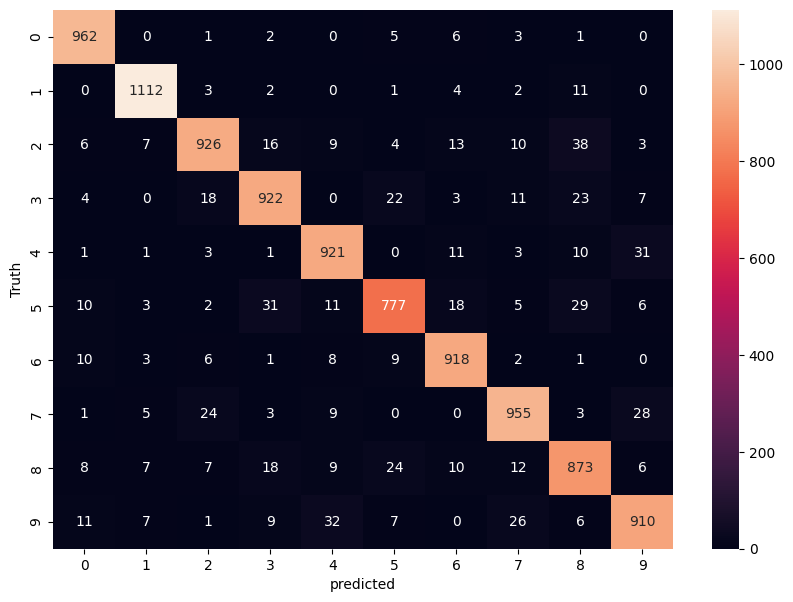

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train_falttened,y_train, epochs = 5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8738 - loss: 0.4473
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9613 - loss: 0.1293
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9729 - loss: 0.0901
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9809 - loss: 0.0632
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9843 - loss: 0.0510


In [ ]:
model.evaluate(X_test_falttened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9734 - loss: 0.0853


[0.07763022184371948, 0.9765999913215637]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

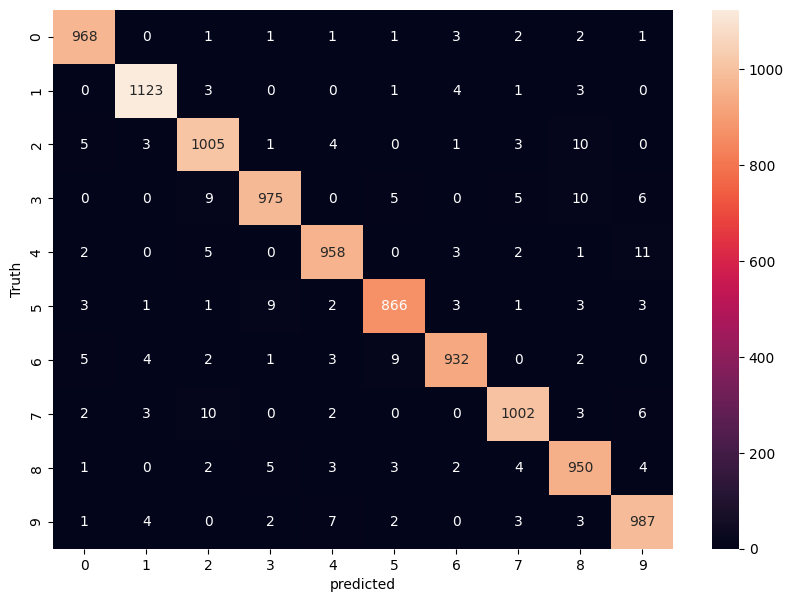

In [ ]:
 y_predicted = model.predict(X_test_falttened)
 y_predicted_label= [ np.argmax(i) for i in y_predicted]

cm  = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_label)
cm


import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100,  activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train,y_train, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8737 - loss: 0.4550
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9614 - loss: 0.1301
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9741 - loss: 0.0862
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9811 - loss: 0.0632
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9864 - loss: 0.0462
